# **HOMEWORK #2 - Embeddings**

## **Matan Oz & Din Kosberg**

In [ ]:
# %% 

import gensim
from gensim.models import Word2Vec
import numpy as np

corpus = [
    "The bank is located near the river.",
    "The bank approved my loan application.",
    "He rose from his chair to close the window.",
    "The rose bloomed beautifully in the garden.",
    "The lead actor delivered a stunning performance.",
    "Exposure to lead is harmful to health.",
    "She is reading a book in the library.",
    "The book mentioned a fascinating historical event.",
    "I need to file a report for my manager.",
    "He lost the file containing important documents."
]

# Use a simple preprocessing: lowercase, tokenize, and remove punctuation
sentences = [gensim.utils.simple_preprocess(doc) for doc in corpus]

print("Tokenized Sentences:")
for i, s in enumerate(sentences, start=1):
    print(f"{i}. {s}")

Tokenized Sentences:
1. ['the', 'bank', 'is', 'located', 'near', 'the', 'river']
2. ['the', 'bank', 'approved', 'my', 'loan', 'application']
3. ['he', 'rose', 'from', 'his', 'chair', 'to', 'close', 'the', 'window']
4. ['the', 'rose', 'bloomed', 'beautifully', 'in', 'the', 'garden']
5. ['the', 'lead', 'actor', 'delivered', 'stunning', 'performance']
6. ['exposure', 'to', 'lead', 'is', 'harmful', 'to', 'health']
7. ['she', 'is', 'reading', 'book', 'in', 'the', 'library']
8. ['the', 'book', 'mentioned', 'fascinating', 'historical', 'event']
9. ['need', 'to', 'file', 'report', 'for', 'my', 'manager']
10. ['he', 'lost', 'the', 'file', 'containing', 'important', 'documents']


In [ ]:
# %%

# === 1(a). Skip-gram Word2Vec ===

skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=50,  # Dimension of embeddings
    window=2,        # Context window size
    min_count=1,     # Include all words
    sg=1,            # Skip-gram
    workers=4,
    epochs=50
)

skipgram_vectors = skipgram_model.wv

print("Skip-gram model trained (window=2).")

Skip-gram model trained (window=2).


In [ ]:
# %%

# === 1(b). CBOW Word2Vec ===

cbow_model = Word2Vec(
    sentences=sentences,
    vector_size=50,  # Dimension of embeddings
    window=2,        # Context window size
    min_count=1,     # Include all words
    sg=0,            # CBOW
    workers=4,
    epochs=50
)

cbow_vectors = cbow_model.wv

print("CBOW model trained (window=2).")

CBOW model trained (window=2).


In [ ]:
# %%

# === 1(c). Apply both models to the text & Inspect MORE outputs ===

# Words of interest
words_of_interest = ["bank", "rose", "lead", "book", "file"]

print("=== First 5 dimensions of embeddings in Skip-gram vs. CBOW ===")
for w in words_of_interest:
    sg_vec = skipgram_vectors[w][:5]
    cbow_vec = cbow_vectors[w][:5]
    print(f"\nWord: '{w}'")
    print(f"  Skip-gram -> {sg_vec}")
    print(f"  CBOW      -> {cbow_vec}")

# Let's also see the top 3 neighbors for each word in both models.
def print_neighbors(model, word, topn=3):
    print(f"Nearest neighbors for '{word}' in {model} model:")
    for neighbor, sim in globals()[f'{model}_vectors'].most_similar(word, topn=topn):
        print(f"  {neighbor} (similarity={sim:.3f})")
    print()

print("\n=== Top 3 Neighbors in Skip-gram vs. CBOW ===")
for w in words_of_interest:
    print_neighbors("skipgram", w, topn=3)
    print_neighbors("cbow", w, topn=3)

=== First 5 dimensions of embeddings in Skip-gram vs. CBOW ===

Word: 'bank'
  Skip-gram -> [ 0.00742879  0.00878987  0.02042848 -0.0084984  -0.00318454]
  CBOW      -> [ 0.0077805   0.00866124  0.02015207 -0.00876274 -0.00298159]

Word: 'rose'
  Skip-gram -> [-0.0172627   0.0183043  -0.00017541 -0.00336388  0.00843488]
  CBOW      -> [-0.01705435  0.01832982 -0.00019449 -0.00361289  0.00892593]

Word: 'lead'
  Skip-gram -> [-0.01471909  0.00234828 -0.01399092 -0.0040541   0.00714399]
  CBOW      -> [-0.01461307  0.00244078 -0.01407107 -0.00420814  0.00724465]

Word: 'book'
  Skip-gram -> [ 0.00208145 -0.00547204 -0.01429785 -0.01532013 -0.01875865]
  CBOW      -> [ 0.00235462 -0.00531049 -0.01424078 -0.01546825 -0.01857406]

Word: 'file'
  Skip-gram -> [-0.0186278   0.00404413 -0.0013076  -0.01791925 -0.01985689]
  CBOW      -> [-0.01802369  0.00406096 -0.00138481 -0.01823852 -0.01912984]

=== Top 3 Neighbors in Skip-gram vs. CBOW ===
Nearest neighbors for 'bank' in skipgram model:
  

In [ ]:
# %%

# === 1(d). Extended comparison between Skip-gram and CBOW embeddings ===

from numpy.linalg import norm

# 1. Euclidean Distance for each word
words_of_interest = ["bank", "rose", "lead", "book", "file"]
print("== Euclidean Distances (Skip-gram vs. CBOW) for words of interest ==")

def euclidean_distance(v1, v2):
    return norm(v1 - v2)

for w in words_of_interest:
    dist = euclidean_distance(skipgram_vectors[w], cbow_vectors[w])
    print(f"Word: '{w}'  -> Euclidean distance: {dist:.4f}")
    
    
# 2. Compare Top-3 Neighbors
print("\n== Comparison of Top-3 Neighbors in Skip-gram vs. CBOW ==")

def top_k_neighbors(model_vectors, word, k=3):
    return model_vectors.most_similar(word, topn=k)

for w in words_of_interest:
    print(f"\nWord: '{w}'")
    # Skip-gram neighbors
    sg_neighbors = top_k_neighbors(skipgram_vectors, w)
    # CBOW neighbors
    cbow_neighbors = top_k_neighbors(cbow_vectors, w)
    
    print("  Skip-gram neighbors:")
    for n, sim in sg_neighbors:
        print(f"    {n} (sim={sim:.3f})")
    
    print("  CBOW neighbors:")
    for n, sim in cbow_neighbors:
        print(f"    {n} (sim={sim:.3f})")

== Euclidean Distances (Skip-gram vs. CBOW) for words of interest ==
Word: 'bank'  -> Euclidean distance: 0.0017
Word: 'rose'  -> Euclidean distance: 0.0017
Word: 'lead'  -> Euclidean distance: 0.0011
Word: 'book'  -> Euclidean distance: 0.0018
Word: 'file'  -> Euclidean distance: 0.0029

== Comparison of Top-3 Neighbors in Skip-gram vs. CBOW ==

Word: 'bank'
  Skip-gram neighbors:
    containing (sim=0.275)
    exposure (sim=0.263)
    harmful (sim=0.246)
  CBOW neighbors:
    containing (sim=0.271)
    exposure (sim=0.259)
    harmful (sim=0.239)

Word: 'rose'
  Skip-gram neighbors:
    containing (sim=0.283)
    approved (sim=0.217)
    book (sim=0.199)
  CBOW neighbors:
    containing (sim=0.278)
    approved (sim=0.212)
    book (sim=0.191)

Word: 'lead'
  Skip-gram neighbors:
    important (sim=0.317)
    file (sim=0.247)
    report (sim=0.235)
  CBOW neighbors:
    important (sim=0.317)
    file (sim=0.244)
    report (sim=0.225)

Word: 'book'
  Skip-gram neighbors:
    bloomed 

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Difference between the embeddings**

**1. Euclidean Distances**  
- All computed distances between Skip-gram and CBOW for polysemous words are **extremely small** (under 0.003).  
- This implies **very similar** embeddings in both models for these words on the tiny corpus.

**2. Nearest Neighbors**  
- Both models yield similar top-3 neighbors.  
- Some neighbors (e.g., *“containing”*, *“exposure”*) appear unrelated at first glance. This often happens in **small corpora** where limited co-occurrences lead to weak or coincidental associations.

**3. Reason for Similarity**  
- **Insufficient Data**: With only 10 sentences, both algorithms converge to nearly the same solutions.  
- **Polysemous Words**: “bank,” “rose,” “lead,” etc. each appear in too few contexts to separate multiple senses (financial vs. river bank, verb “rose” vs. flower “rose,” and so on).

**4. Recommendations**  
- **Use a Larger Corpus**: More data amplifies the differences between Skip-gram and CBOW.  
- **Tune Hyperparameters**: Increasing window size or embedding dimension can surface nuanced differences.  
- **Visualize**: Plot embeddings with t-SNE or UMAP to see if any small clusters form.

---

> **Conclusion**: On this tiny dataset, Skip-gram and CBOW learn nearly identical embeddings. To reveal more meaningful distinctions—especially for polysemous words—train on a **larger** or **domain-specific** corpus.
"""

# Display the formatted analysis in a Jupyter notebook cell.
display(Markdown(analysis_text))


# **Difference between the embeddings**

**1. Euclidean Distances**  
- All computed distances between Skip-gram and CBOW for polysemous words are **extremely small** (under 0.003).  
- This implies **very similar** embeddings in both models for these words on the tiny corpus.

**2. Nearest Neighbors**  
- Both models yield similar top-3 neighbors.  
- Some neighbors (e.g., *“containing”*, *“exposure”*) appear unrelated at first glance. This often happens in **small corpora** where limited co-occurrences lead to weak or coincidental associations.

**3. Reason for Similarity**  
- **Insufficient Data**: With only 10 sentences, both algorithms converge to nearly the same solutions.  
- **Polysemous Words**: “bank,” “rose,” “lead,” etc. each appear in too few contexts to separate multiple senses (financial vs. river bank, verb “rose” vs. flower “rose,” and so on).

**4. Recommendations**  
- **Use a Larger Corpus**: More data amplifies the differences between Skip-gram and CBOW.  
- **Tune Hyperparameters**: Increasing window size or embedding dimension can surface nuanced differences.  
- **Visualize**: Plot embeddings with t-SNE or UMAP to see if any small clusters form.

---

> **Conclusion**: On this tiny dataset, Skip-gram and CBOW learn nearly identical embeddings. To reveal more meaningful distinctions—especially for polysemous words—train on a **larger** or **domain-specific** corpus.


In [ ]:
# %%

# === 1(e). Find a text whose embedding is similar in both algorithms ===

# We will:
#  1. Check each word in the vocabulary.
#  2. Compute Euclidean distance between Skip-gram & CBOW embeddings.
#  3. Sort them by ascending distance to see which ones are "most similar."

from numpy.linalg import norm

def euclidean_distance(v1, v2):
    return norm(v1 - v2)

# Collect all words from our models' vocab (should be the same here).
all_words = list(skipgram_vectors.key_to_index.keys())

word_distances = []
for word in all_words:
    dist = euclidean_distance(skipgram_vectors[word], cbow_vectors[word])
    word_distances.append((word, dist))

# Sort by ascending distance
word_distances.sort(key=lambda x: x[1])

# Print the top N words with the smallest distance
N = 5
print(f"=== Top {N} words with smallest Euclidean distance (Skip-gram vs. CBOW) ===")
for i in range(N):
    w, d = word_distances[i]
    print(f"{i+1}. '{w}' -> distance: {d:.4f}")

# Example check for a frequent word like 'the'
word = "the"
dist_the = euclidean_distance(skipgram_vectors[word], cbow_vectors[word])
print(f"\nDistance for '{word}' -> {dist_the:.4f}")

=== Top 5 words with smallest Euclidean distance (Skip-gram vs. CBOW) ===
1. 'window' -> distance: 0.0006
2. 'event' -> distance: 0.0007
3. 'loan' -> distance: 0.0007
4. 'health' -> distance: 0.0007
5. 'actor' -> distance: 0.0007

Distance for 'the' -> 0.0024


In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Short Explanation for 1(e)**

## **Results Recap**

**Top 5 words with smallest distance** between Skip-gram and CBOW:
1. *window* → **0.0006**  
2. *event* → **0.0007**  
3. *loan* → **0.0007**  
4. *health* → **0.0007**  
5. *actor* → **0.0007**

**'the'** → distance of **0.0024**

---

## **Analysis**

1. **Minimal Occurrences**  
   - Words like *window*, *event*, *loan*, etc. appear **only once or twice** in the entire corpus.  
   - Both Skip-gram and CBOW see **identical** (or nearly identical) context information for these rarely used words. Hence, their embeddings converge almost perfectly.

2. **Constrained Contexts**  
   - These words pop up in **very specific** sentences, so there's no variation for the models to treat them differently.  
   - As a result, the **Euclidean distance** between Skip-gram and CBOW vectors remains **extremely low** (under 0.001 in most cases).

3. **Why “the” Shows Higher Distance**  
   - Despite being a **function word**, in a **tiny corpus** it still has **multiple** distinct contexts.  
   - This small variety can introduce a **slightly higher** difference between how Skip-gram and CBOW place “the,” though the distance is still **quite small** overall (0.0024).

---

## **Conclusion**

> **Rare, single-context words** (like *window* or *loan*) end up almost **identical** in both models because there's too little training data for any divergence.  
> **Function words** (like *the*) can still show **slightly larger** differences in this toy corpus, simply because they occur in a **broader** range of contexts—even though the overall distance is still minimal compared to what you'd see on a large dataset.
"""

display(Markdown(analysis_text))


# **Short Explanation for 1(e)**

## **Results Recap**

**Top 5 words with smallest distance** between Skip-gram and CBOW:
1. *window* → **0.0006**  
2. *event* → **0.0007**  
3. *loan* → **0.0007**  
4. *health* → **0.0007**  
5. *actor* → **0.0007**

**'the'** → distance of **0.0024**

---

## **Analysis**

1. **Minimal Occurrences**  
   - Words like *window*, *event*, *loan*, etc. appear **only once or twice** in the entire corpus.  
   - Both Skip-gram and CBOW see **identical** (or nearly identical) context information for these rarely used words. Hence, their embeddings converge almost perfectly.

2. **Constrained Contexts**  
   - These words pop up in **very specific** sentences, so there's no variation for the models to treat them differently.  
   - As a result, the **Euclidean distance** between Skip-gram and CBOW vectors remains **extremely low** (under 0.001 in most cases).

3. **Why “the” Shows Higher Distance**  
   - Despite being a **function word**, in a **tiny corpus** it still has **multiple** distinct contexts.  
   - This small variety can introduce a **slightly higher** difference between how Skip-gram and CBOW place “the,” though the distance is still **quite small** overall (0.0024).

---

## **Conclusion**

> **Rare, single-context words** (like *window* or *loan*) end up almost **identical** in both models because there's too little training data for any divergence.  
> **Function words** (like *the*) can still show **slightly larger** differences in this toy corpus, simply because they occur in a **broader** range of contexts—even though the overall distance is still minimal compared to what you'd see on a large dataset.


In [ ]:
# %%

# === 1(f). Repeat step (c) with different window sizes ===

from gensim.models import Word2Vec

# We'll train Skip-gram and CBOW models with a larger window (e.g., 5).
skipgram_model_w5 = Word2Vec(
    sentences=sentences,
    vector_size=50,
    window=5,  # larger window
    min_count=1,
    sg=1,      # Skip-gram
    workers=4,
    epochs=50
)

cbow_model_w5 = Word2Vec(
    sentences=sentences,
    vector_size=50,
    window=5,  # larger window
    min_count=1,
    sg=0,      # CBOW
    workers=4,
    epochs=50
)

# Let's compare a few embeddings and neighbors:
words_of_interest = ["bank", "rose", "lead", "book", "file"]

print("=== Skip-gram (window=5): First 5 dims of 'bank' ===")
print(skipgram_model_w5.wv["bank"][:5])

print("\n=== CBOW (window=5): First 5 dims of 'bank' ===")
print(cbow_model_w5.wv["bank"][:5])

# Check top 3 neighbors for 'bank' to see if there's a difference
print("\n=== Skip-gram (window=5) neighbors for 'bank' ===")
for neighbor, sim in skipgram_model_w5.wv.most_similar("bank", topn=3):
    print(f"  {neighbor} (sim={sim:.3f})")

print("\n=== CBOW (window=5) neighbors for 'bank' ===")
for neighbor, sim in cbow_model_w5.wv.most_similar("bank", topn=3):
    print(f"  {neighbor} (sim={sim:.3f})")

=== Skip-gram (window=5): First 5 dims of 'bank' ===
[ 0.00749896  0.00877408  0.01978303 -0.0081952  -0.00335471]

=== CBOW (window=5): First 5 dims of 'bank' ===
[ 0.00763077  0.00869124  0.01984076 -0.00859322 -0.00320463]

=== Skip-gram (window=5) neighbors for 'bank' ===
  containing (sim=0.280)
  exposure (sim=0.278)
  book (sim=0.243)

=== CBOW (window=5) neighbors for 'bank' ===
  containing (sim=0.273)
  exposure (sim=0.265)
  book (sim=0.237)


In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Short Analysis for 1(f)**

## **Observations**

1. **Embedding Values**  
   - Skip-gram (window=5) vs. CBOW (window=5) for 'bank' show nearly identical first 5 dimensions:
     ```
     Skip-gram: [ 0.00749896  0.00877408  0.01978303 -0.00819520 -0.00335471]
     CBOW:      [ 0.00763077  0.00869124  0.01984076 -0.00859322 -0.00320463]
     ```
   - These small numerical differences suggest **slightly** different embeddings but still very close.

2. **Nearest Neighbors**  
   - For 'bank', **both** models list *containing* and *exposure* as top neighbors, then *book*.  
   - Similar to the smaller window (2) results, we see **largely the same** neighbors.

3. **Why Are They Similar?**  
   - With a **tiny** corpus, even a larger window (5) doesn’t dramatically alter co-occurrences.  
   - Both models see the same limited contexts, leading to **overlapping** neighbors.

## **Conclusion**

> **Increasing the window size** to 5 does not yield a **substantial** change in the embeddings or neighbors for 'bank'. On a **larger dataset**, we’d typically see **more noticeable** shifts in semantic vs. syntactic capture.
"""

display(Markdown(analysis_text))


# **Short Analysis for 1(f)**

## **Observations**

1. **Embedding Values**  
   - Skip-gram (window=5) vs. CBOW (window=5) for 'bank' show nearly identical first 5 dimensions:
     ```
     Skip-gram: [ 0.00749896  0.00877408  0.01978303 -0.00819520 -0.00335471]
     CBOW:      [ 0.00763077  0.00869124  0.01984076 -0.00859322 -0.00320463]
     ```
   - These small numerical differences suggest **slightly** different embeddings but still very close.

2. **Nearest Neighbors**  
   - For 'bank', **both** models list *containing* and *exposure* as top neighbors, then *book*.  
   - Similar to the smaller window (2) results, we see **largely the same** neighbors.

3. **Why Are They Similar?**  
   - With a **tiny** corpus, even a larger window (5) doesn’t dramatically alter co-occurrences.  
   - Both models see the same limited contexts, leading to **overlapping** neighbors.

## **Conclusion**

> **Increasing the window size** to 5 does not yield a **substantial** change in the embeddings or neighbors for 'bank'. On a **larger dataset**, we’d typically see **more noticeable** shifts in semantic vs. syntactic capture.


In [ ]:
# %%

# === 1(g). Compare Skip-gram and CBOW for syntactic vs. semantic relationships ===

# We'll look at top neighbors for multiple words to see if there's a pattern 
# reflecting syntax (local context) vs. semantics (broader meaning).

words_of_interest = ["bank", "rose", "lead", "book", "file"]

def print_top_neighbors(model_name, word, topn=3):
    """
    Prints the top neighbors for a given word in a chosen model (skipgram or cbow).
    """
    vectors = globals()[f"{model_name}_vectors"]  # e.g., skipgram_vectors or cbow_vectors
    neighbors = vectors.most_similar(word, topn=topn)
    print(f"  [{model_name.upper()}] Top {topn} neighbors for '{word}':")
    for n, sim in neighbors:
        print(f"    {n} (similarity={sim:.3f})")
    print()

print("=== Comparison of Syntactic & Semantic Relationships in Skip-gram vs. CBOW ===")
for w in words_of_interest:
    print(f"\nWord: '{w}'")
    print_top_neighbors("skipgram", w, topn=3)
    print_top_neighbors("cbow", w, topn=3)

=== Comparison of Syntactic & Semantic Relationships in Skip-gram vs. CBOW ===

Word: 'bank'
  [SKIPGRAM] Top 3 neighbors for 'bank':
    containing (similarity=0.275)
    exposure (similarity=0.263)
    harmful (similarity=0.246)

  [CBOW] Top 3 neighbors for 'bank':
    containing (similarity=0.271)
    exposure (similarity=0.259)
    harmful (similarity=0.239)


Word: 'rose'
  [SKIPGRAM] Top 3 neighbors for 'rose':
    containing (similarity=0.283)
    approved (similarity=0.217)
    book (similarity=0.199)

  [CBOW] Top 3 neighbors for 'rose':
    containing (similarity=0.278)
    approved (similarity=0.212)
    book (similarity=0.191)


Word: 'lead'
  [SKIPGRAM] Top 3 neighbors for 'lead':
    important (similarity=0.317)
    file (similarity=0.247)
    report (similarity=0.235)

  [CBOW] Top 3 neighbors for 'lead':
    important (similarity=0.317)
    file (similarity=0.244)
    report (similarity=0.225)


Word: 'book'
  [SKIPGRAM] Top 3 neighbors for 'book':
    bloomed (similar

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Short Analysis for 1(g)**

## **Results Overview**

The top-3 neighbors for words like **'bank'**, **'rose'**, **'lead'**, **'book'**, and **'file'** are largely the same across both **Skip-gram** and **CBOW**:
- Shared neighbors include *containing*, *exposure*, *approved*, etc.
- Similar similarity scores (0.27 vs. 0.26, etc.) suggest **both models** are converging on **comparable** embeddings.

---

## **Why Are They So Similar?**
1. **Tiny Corpus**  
   - With only 10 sentences, each word has very few contextual clues.
   - Both models end up with nearly identical co-occurrence patterns to learn from.

2. **Mixed Domain and Polysemy**  
   - Words like “bank” or “rose” each appear in **two** or **fewer** contexts, covering different meanings (financial vs. geographical, verb “rose” vs. noun “rose”).  
   - The models don’t have enough data to strongly separate these senses.

---

## **Syntactic vs. Semantic Capture**
- **Skip-gram** often picks up more nuanced relationships, especially for **rare** words, by predicting context from the center.
- **CBOW** aggregates multiple context words, sometimes yielding more stable embeddings for **frequent** words.

**However**, in this tiny dataset:
- Both algorithms see **minimal, overlapping** contexts.
- They therefore produce **nearly identical** semantic neighborhoods.

---

## **Conclusion**
> **In a large corpus**, we might see stronger differences:
> - Skip-gram capturing more **fine-grained** or **rare** word nuances.
> - CBOW providing more **smoothed** or **average** embeddings for frequent words.

Here, the data is too limited to illustrate major distinctions, so **both models** converge to similar top neighbors and similarity scores.
"""

display(Markdown(analysis_text))


# **Short Analysis for 1(g)**

## **Results Overview**

The top-3 neighbors for words like **'bank'**, **'rose'**, **'lead'**, **'book'**, and **'file'** are largely the same across both **Skip-gram** and **CBOW**:
- Shared neighbors include *containing*, *exposure*, *approved*, etc.
- Similar similarity scores (0.27 vs. 0.26, etc.) suggest **both models** are converging on **comparable** embeddings.

---

## **Why Are They So Similar?**
1. **Tiny Corpus**  
   - With only 10 sentences, each word has very few contextual clues.
   - Both models end up with nearly identical co-occurrence patterns to learn from.

2. **Mixed Domain and Polysemy**  
   - Words like “bank” or “rose” each appear in **two** or **fewer** contexts, covering different meanings (financial vs. geographical, verb “rose” vs. noun “rose”).  
   - The models don’t have enough data to strongly separate these senses.

---

## **Syntactic vs. Semantic Capture**
- **Skip-gram** often picks up more nuanced relationships, especially for **rare** words, by predicting context from the center.
- **CBOW** aggregates multiple context words, sometimes yielding more stable embeddings for **frequent** words.

**However**, in this tiny dataset:
- Both algorithms see **minimal, overlapping** contexts.
- They therefore produce **nearly identical** semantic neighborhoods.

---

## **Conclusion**
> **In a large corpus**, we might see stronger differences:
> - Skip-gram capturing more **fine-grained** or **rare** word nuances.
> - CBOW providing more **smoothed** or **average** embeddings for frequent words.

Here, the data is too limited to illustrate major distinctions, so **both models** converge to similar top neighbors and similarity scores.


In [ ]:
# %%

# === 1(h). Cosine Similarities (Skip-gram vs. CBOW) with More Words (Visually) ===

import numpy as np
import pandas as pd
from IPython.display import display

# Larger list of words from our toy corpus
words_of_interest = [
    "bank", "river", "loan", "approved", "rose", 
    "chair", "window", "lead", "actor", "book", 
    "file", "manager", "application"
]

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def build_similarity_df(model_vectors, words):
    """
    Returns a pandas DataFrame of cosine similarities for the given model_vectors 
    and list of words.
    """
    data = []
    for w1 in words:
        row = []
        for w2 in words:
            if w1 == w2:
                row.append(1.0)  # self-similarity = 1.0
            else:
                sim = cosine_similarity(model_vectors[w1], model_vectors[w2])
                row.append(sim)
        data.append(row)
    df = pd.DataFrame(data, columns=words, index=words)
    return df

# Build and display the similarity DataFrames with color-coding
skipgram_df = build_similarity_df(skipgram_vectors, words_of_interest)
cbow_df = build_similarity_df(cbow_vectors, words_of_interest)

print("=== Skip-gram Similarity Matrix ===")
display(skipgram_df.style.background_gradient(cmap="Blues").format("{:.3f}"))

print("=== CBOW Similarity Matrix ===")
display(cbow_df.style.background_gradient(cmap="Greens").format("{:.3f}"))

=== Skip-gram Similarity Matrix ===


,bank,river,loan,approved,rose,chair,window,lead,actor,book,file,manager,application
bank,1.000,0.114,0.099,0.061,0.107,0.081,0.133,-0.242,0.189,0.230,-0.083,0.124,0.080
river,0.114,1.000,0.108,-0.038,0.113,0.127,0.187,-0.220,0.161,-0.081,0.119,-0.028,0.339
loan,0.099,0.108,1.000,0.045,0.037,0.319,0.401,0.109,-0.018,0.215,-0.048,0.122,-0.293
approved,0.061,-0.038,0.045,1.000,0.217,0.084,0.004,0.056,-0.301,0.278,0.175,0.114,-0.032
rose,0.107,0.113,0.037,0.217,1.000,0.090,-0.010,-0.075,0.194,0.199,0.191,0.042,0.118
chair,0.081,0.127,0.319,0.084,0.090,1.000,0.536,0.063,0.161,0.208,0.090,-0.054,-0.085
window,0.133,0.187,0.401,0.004,-0.010,0.536,1.000,-0.013,0.241,0.094,-0.054,0.074,0.122
lead,-0.242,-0.220,0.109,0.056,-0.075,0.063,-0.013,1.000,-0.088,-0.092,0.247,0.065,-0.105
actor,0.189,0.161,-0.018,-0.301,0.194,0.161,0.241,-0.088,1.000,0.099,0.036,-0.070,-0.081
book,0.230,-0.081,0.215,0.278,0.199,0.208,0.094,-0.092,0.099,1.000,-0.064,-0.087,-0.258


=== CBOW Similarity Matrix ===


,bank,river,loan,approved,rose,chair,window,lead,actor,book,file,manager,application
bank,1.000,0.109,0.094,0.057,0.104,0.073,0.131,-0.249,0.187,0.231,-0.098,0.111,0.078
river,0.109,1.000,0.105,-0.036,0.111,0.125,0.185,-0.223,0.161,-0.078,0.117,-0.033,0.339
loan,0.094,0.105,1.000,0.040,0.033,0.313,0.401,0.104,-0.019,0.214,-0.058,0.117,-0.295
approved,0.057,-0.036,0.040,1.000,0.212,0.080,0.000,0.054,-0.305,0.272,0.174,0.102,-0.033
rose,0.104,0.111,0.033,0.212,1.000,0.082,-0.016,-0.078,0.189,0.191,0.180,0.029,0.117
chair,0.073,0.125,0.313,0.080,0.082,1.000,0.535,0.058,0.159,0.210,0.082,-0.069,-0.085
window,0.131,0.185,0.401,0.000,-0.016,0.535,1.000,-0.018,0.241,0.094,-0.063,0.073,0.119
lead,-0.249,-0.223,0.104,0.054,-0.078,0.058,-0.018,1.000,-0.091,-0.095,0.244,0.055,-0.104
actor,0.187,0.161,-0.019,-0.305,0.189,0.159,0.241,-0.091,1.000,0.094,0.032,-0.073,-0.080
book,0.231,-0.078,0.214,0.272,0.191,0.210,0.094,-0.095,0.094,1.000,-0.073,-0.100,-0.257


In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Short Analysis for 1(h)**

## **1. Overall Similarities**

- Most entries in both Skip-gram and CBOW matrices fall between **-0.30** and **0.40**, indicating **relatively weak** similarities.  
- Negative values (e.g., *lead* vs. *bank* ~ -0.24) occur when two words share **almost no** overlapping context or have contexts that the model deems inversely related.  
- Positive values (up to ~0.54) suggest those words appeared together or in **similar** contexts often enough for the model to link them.

## **2. Noticeable Observations**

1. **High Similarities**  
   - *chair* and *window* (~0.54): They appear in the same sentence (*He rose from his chair to close the window*), hence the models learned a **strong** link.  
   - *loan* and *window* (~0.40): Possibly because “loan” and “window” both share minimal (but coincidental) context or appear near words like *bank*, *approved* in tight proximity.

2. **Polysemous Words**  
   - **bank**, **lead**, **rose**: 
     - *bank* doesn't strongly tie to *river* or *loan* in the matrix, likely due to the **tiny** corpus where each sense appears only once or twice.  
     - *lead* has some negative values, suggesting it rarely shares context with words like *bank*, *rose*, or *book*. It's used in “Exposure to lead is harmful…” or “The lead actor…”, which are quite different from other contexts.

3. **Skip-gram vs. CBOW Differences**  
   - The numbers are **very close** (e.g., *bank*–*window*: ~0.13 vs. ~0.13).  
   - This is expected because we have a **small** dataset, so both models see limited contexts and converge to **similar** embeddings overall.  
   - In a **larger** corpus, the difference in negative vs. positive sampling (Skip-gram) and context averaging (CBOW) would be more pronounced.

## **3. Key Takeaways**

- **Sparse Data**: With only 10 sentences, many words appear just once. That means these similarities can feel almost “random.”  
- **Minor Differences**: The extremely limited corpus makes Skip-gram and CBOW look almost the same.  
- **Polysemy & Semantics**: We see *some* evidence of multiple meanings (e.g., *lead*), but the corpus size doesn’t let either model truly separate them.

## **Conclusion**

> **On a real-world corpus,** we’d expect:
> - **Skip-gram** to capture more subtle word senses or rare-word nuances.
> - **CBOW** to group together words that appear in similar broad contexts, especially frequent words.

Here, both matrices look **alike**, highlighting how **tiny** or **scattered** data leads to nearly identical embeddings.
"""

display(Markdown(analysis_text))


# **Short Analysis for 1(h)**

## **1. Overall Similarities**

- Most entries in both Skip-gram and CBOW matrices fall between **-0.30** and **0.40**, indicating **relatively weak** similarities.  
- Negative values (e.g., *lead* vs. *bank* ~ -0.24) occur when two words share **almost no** overlapping context or have contexts that the model deems inversely related.  
- Positive values (up to ~0.54) suggest those words appeared together or in **similar** contexts often enough for the model to link them.

## **2. Noticeable Observations**

1. **High Similarities**  
   - *chair* and *window* (~0.54): They appear in the same sentence (*He rose from his chair to close the window*), hence the models learned a **strong** link.  
   - *loan* and *window* (~0.40): Possibly because “loan” and “window” both share minimal (but coincidental) context or appear near words like *bank*, *approved* in tight proximity.

2. **Polysemous Words**  
   - **bank**, **lead**, **rose**: 
     - *bank* doesn't strongly tie to *river* or *loan* in the matrix, likely due to the **tiny** corpus where each sense appears only once or twice.  
     - *lead* has some negative values, suggesting it rarely shares context with words like *bank*, *rose*, or *book*. It's used in “Exposure to lead is harmful…” or “The lead actor…”, which are quite different from other contexts.

3. **Skip-gram vs. CBOW Differences**  
   - The numbers are **very close** (e.g., *bank*–*window*: ~0.13 vs. ~0.13).  
   - This is expected because we have a **small** dataset, so both models see limited contexts and converge to **similar** embeddings overall.  
   - In a **larger** corpus, the difference in negative vs. positive sampling (Skip-gram) and context averaging (CBOW) would be more pronounced.

## **3. Key Takeaways**

- **Sparse Data**: With only 10 sentences, many words appear just once. That means these similarities can feel almost “random.”  
- **Minor Differences**: The extremely limited corpus makes Skip-gram and CBOW look almost the same.  
- **Polysemy & Semantics**: We see *some* evidence of multiple meanings (e.g., *lead*), but the corpus size doesn’t let either model truly separate them.

## **Conclusion**

> **On a real-world corpus,** we’d expect:
> - **Skip-gram** to capture more subtle word senses or rare-word nuances.
> - **CBOW** to group together words that appear in similar broad contexts, especially frequent words.

Here, both matrices look **alike**, highlighting how **tiny** or **scattered** data leads to nearly identical embeddings.


In [ ]:
# %%

# === 1(i). How can subword embeddings be applied? (FastText) with more words displayed ===

from gensim.models import FastText

# (Re)Train a FastText model (subword-based) on our toy corpus
fasttext_model = FastText(
    sentences=sentences,
    vector_size=50,  # dimension of embeddings
    window=2,
    min_count=1,
    sg=1,            # 1 = Skip-gram (could be 0 for CBOW)
    workers=4,
    epochs=50
)

# Extract FastText word vectors
fasttext_vectors = fasttext_model.wv

# List of known and OOV/misspelled words to inspect
words_to_check = [
    "bank",    # in-vocab
    "bnk",     # OOV/misspelled variant of "bank"
    "rose",    
    "rse",     # OOV/misspelled variant of "rose"
    "lead",    
    "led",     # OOV/misspelled/shortened variant of "lead"
    "file",
    "flie",    # misspelled variant of "file"
    "application",
    "aplicaton",  # OOV variant of "application"
    "actor",
    "actr",    # OOV variant of "actor"
]

print("=== Demonstrating FastText Subword Embeddings ===")
for w in words_to_check:
    vec_5dims = fasttext_vectors[w][:5]  # first 5 dimensions
    print(f"Word: '{w}' -> first 5 dims: {vec_5dims}")

=== Demonstrating FastText Subword Embeddings ===
Word: 'bank' -> first 5 dims: [ 0.00080656 -0.00536458  0.00340595 -0.00062492 -0.00243321]
Word: 'bnk' -> first 5 dims: [ 2.8123239e-03 -3.5092372e-03  2.6607420e-04  6.7144907e-03
  1.0508210e-05]
Word: 'rose' -> first 5 dims: [ 0.00410113  0.00677149 -0.00254811 -0.00536107 -0.0009727 ]
Word: 'rse' -> first 5 dims: [-0.00548157 -0.00188394 -0.00115184  0.00383864 -0.0007506 ]
Word: 'lead' -> first 5 dims: [-0.00099485 -0.00274583 -0.00112858  0.00134152  0.00200656]
Word: 'led' -> first 5 dims: [-0.00193777 -0.00510902  0.00434961  0.00160077 -0.0014135 ]
Word: 'file' -> first 5 dims: [-0.00389561 -0.00192958  0.00270987 -0.00026947 -0.00200585]
Word: 'flie' -> first 5 dims: [ 0.00159057 -0.0085086  -0.00179288  0.00784466  0.00050035]
Word: 'application' -> first 5 dims: [ 0.00089123 -0.00328071  0.00211781 -0.00211027 -0.00139453]
Word: 'aplicaton' -> first 5 dims: [ 0.0007613   0.00146596 -0.00082555 -0.00338917 -0.00105595]
Word:

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Short Analysis for 1(i): FastText Subword Embeddings**

## **1. Observation**
We requested FastText embeddings for both **valid** words (like *bank*, *rose*, *lead*, *file*) and **misspelled** or **OOV** variations (like *bnk*, *rse*, *led*, *flie*). The model produced **unique vectors** for each.

- *bank* vs. *bnk*  
  - *bank* is in-vocabulary, so it has a trained embedding reflecting its contexts.  
  - *bnk* does **not** appear in the original text, yet FastText builds its embedding from **character n-grams** (e.g., *b*, *n*, *k*, *bn*, *nk*, etc.).  
- *rose* vs. *rse*  
  - *rose* occurs in sentences about a flower and as the past tense of *rise*.  
  - *rse* shares subwords (like *r*, *s*, *e*) even though it's an **OOV** token.  
- *lead* vs. *led*  
  - *lead* might appear in contexts like *lead actor*, *exposure to lead*, capturing multiple senses.  
  - *led* is a separate word that doesn’t appear in the corpus, but subword embeddings handle it gracefully.  

## **2. Implications of Subword Embeddings**
1. **OOV Robustness**  
   FastText never returns “unknown” for *bnk* or *rse*, since it aggregates subword vectors to estimate an embedding.
2. **Morphological Awareness**  
   Misspelled or variant forms (*flie* vs. *file*) share overlapping n-grams, hence partial similarity.
3. **Limitations in Small Data**  
   On a **tiny** corpus, subword learning has **limited** examples of each n-gram. For large real-world corpora, subword modeling greatly improves coverage for **rare** words and forms.

## **3. Conclusion**
> **FastText** leverages **character n-grams** to generate embeddings even for unseen or misspelled words.  
> This solves the OOV issue and can capture morphological relationships.  
> In a **larger corpus**, it produces more robust and semantically consistent embeddings for variant forms (e.g., plural, misspelled, or newly coined words).
"""

display(Markdown(analysis_text))


# **Short Analysis for 1(i): FastText Subword Embeddings**

## **1. Observation**
We requested FastText embeddings for both **valid** words (like *bank*, *rose*, *lead*, *file*) and **misspelled** or **OOV** variations (like *bnk*, *rse*, *led*, *flie*). The model produced **unique vectors** for each.

- *bank* vs. *bnk*  
  - *bank* is in-vocabulary, so it has a trained embedding reflecting its contexts.  
  - *bnk* does **not** appear in the original text, yet FastText builds its embedding from **character n-grams** (e.g., *b*, *n*, *k*, *bn*, *nk*, etc.).  
- *rose* vs. *rse*  
  - *rose* occurs in sentences about a flower and as the past tense of *rise*.  
  - *rse* shares subwords (like *r*, *s*, *e*) even though it's an **OOV** token.  
- *lead* vs. *led*  
  - *lead* might appear in contexts like *lead actor*, *exposure to lead*, capturing multiple senses.  
  - *led* is a separate word that doesn’t appear in the corpus, but subword embeddings handle it gracefully.  

## **2. Implications of Subword Embeddings**
1. **OOV Robustness**  
   FastText never returns “unknown” for *bnk* or *rse*, since it aggregates subword vectors to estimate an embedding.
2. **Morphological Awareness**  
   Misspelled or variant forms (*flie* vs. *file*) share overlapping n-grams, hence partial similarity.
3. **Limitations in Small Data**  
   On a **tiny** corpus, subword learning has **limited** examples of each n-gram. For large real-world corpora, subword modeling greatly improves coverage for **rare** words and forms.

## **3. Conclusion**
> **FastText** leverages **character n-grams** to generate embeddings even for unseen or misspelled words.  
> This solves the OOV issue and can capture morphological relationships.  
> In a **larger corpus**, it produces more robust and semantically consistent embeddings for variant forms (e.g., plural, misspelled, or newly coined words).


In [ ]:
# %%

# === Q2: Demonstrate Polysemy with Static vs. Contextual Embeddings in One Cell ===
# 1. Install and import dependencies

import gensim
from gensim.models import Word2Vec
import torch
from transformers import AutoModel, AutoTokenizer

# 2. Create example sentences for polysemous words
example_sentences = [
    "He rose from his chair to deliver a speech.",   # 'rose' as verb (past tense of 'rise')
    "The rose bloomed beautifully in the garden.",   # 'rose' as noun (flower)
    "I need to visit the bank to deposit my check.", # 'bank' as financial institution
    "We rested on the bank of the river.",           # 'bank' as river side
    "She decided to lead the project until completion.",  # 'lead' as verb (to guide)
    "Exposure to lead is harmful to health."              # 'lead' as a toxic metal
]

print("=== Example Sentences Demonstrating Polysemy ===")
for i, sent in enumerate(example_sentences, start=1):
    print(f"{i}. {sent}")

# 3. Train a minimal Word2Vec model (static embeddings)
print("\n=== Training Word2Vec (Static Embeddings) ===")
tokenized_sents = [gensim.utils.simple_preprocess(sent) for sent in example_sentences]
w2v_model = Word2Vec(
    sentences=tokenized_sents,
    vector_size=50,
    window=2,
    min_count=1,
    sg=1,  # Skip-gram
    workers=2,
    epochs=50
)
w2v_vectors = w2v_model.wv
print("Word2Vec training complete on the tiny corpus.")

# Show the single Word2Vec embedding for 'rose' (same vector for both senses)
print("\nWord2Vec single embedding for 'rose' (first 5 dims):")
print(w2v_vectors["rose"][:5])

# 4. Extract contextual embeddings using BERT
print("\n=== Extracting Contextual Embeddings with BERT (Contextual) ===")
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_contextual_embeddings(sentence, target_word):
    """
    Returns the average embedding for the target_word in the sentence 
    from BERT's final hidden state. (Simplified approach.)
    """
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    hidden_states = outputs.last_hidden_state[0]  # (sequence_length, hidden_size)
    
    # Tokenize separately to find subword indices
    tokens = tokenizer.tokenize(sentence)
    # We'll look for subwords containing target_word (lowercased).
    indices = [i for i, tk in enumerate(tokens) if target_word.lower() in tk]
    
    if not indices:
        return None
    
    # Offset for [CLS] is 1 in this simplified approach
    offset = 1
    word_vectors = []
    for idx in indices:
        word_vectors.append(hidden_states[idx + offset])
    
    if len(word_vectors) == 0:
        return None
    elif len(word_vectors) == 1:
        return word_vectors[0]
    else:
        return torch.mean(torch.stack(word_vectors), dim=0)

# 5. Demonstrate polysemy: 'rose' in two different contexts
print("\n--- Checking 'rose' in different sentences ---")

sent_verb = "He rose from his chair to deliver a speech."
sent_noun = "The rose bloomed beautifully in the garden."

emb_verb_rose = get_contextual_embeddings(sent_verb, "rose")
emb_noun_rose = get_contextual_embeddings(sent_noun, "rose")

print(f"\nBERT embedding for 'rose' (verb sense) -> first 5 dims:")
if emb_verb_rose is not None:
    print(emb_verb_rose[:5])
else:
    print("Not found in tokens")

print(f"\nBERT embedding for 'rose' (flower sense) -> first 5 dims:")
if emb_noun_rose is not None:
    print(emb_noun_rose[:5])
else:
    print("Not found in tokens")

from IPython.display import Markdown, display

analysis_text = """
# **Short Analysis for Polysemy Demonstration**

## **Observations**

1. **Word2Vec (Static)**
   - **Single Vector** for 'rose' → `[-0.01732692, 0.00707374, 0.01072254, 0.01156665, 0.01476559]`
   - Word2Vec merges **all uses** of 'rose' into **one** embedding, ignoring the difference between **'rose' (verb)** and **'rose' (flower)**.

2. **BERT (Contextual)**
   - **Verb Sense ('He rose ...')** → `[ -0.0260, -0.3900, 0.3947, -0.2319, 0.2355 ]`
   - **Flower Sense ('The rose ...')** → `[ 0.2072, -0.3515, 0.0445, 0.4116, 0.8754 ]`
   - Each **occurrence** of the word 'rose' receives a **unique** embedding that reflects **local context**. 

## **Why This Matters**

- **Polysemy**: Words can have multiple meanings (e.g., 'rose' as a flower vs. past tense of 'rise').  
- **Static Embeddings** (like Word2Vec) produce **one** vector per word, unable to distinguish context-specific senses.  
- **Contextual Embeddings** (like BERT) generate **different** embeddings for **each usage**, capturing the intended sense or part-of-speech.

## **Conclusion**

> **Contextual models** (BERT) effectively **disambiguate** multiple meanings of the same word by **analyzing** the sentence around it.  
> In contrast, **Word2Vec** merges all senses into a **single** representation, which may be less accurate for tasks requiring **fine-grained** sense distinctions.
"""

display(Markdown(analysis_text))

=== Example Sentences Demonstrating Polysemy ===
1. He rose from his chair to deliver a speech.
2. The rose bloomed beautifully in the garden.
3. I need to visit the bank to deposit my check.
4. We rested on the bank of the river.
5. She decided to lead the project until completion.
6. Exposure to lead is harmful to health.

=== Training Word2Vec (Static Embeddings) ===
Word2Vec training complete on the tiny corpus.

Word2Vec single embedding for 'rose' (first 5 dims):
[-0.01732692  0.00707374  0.01072254  0.01156665  0.01476559]

=== Extracting Contextual Embeddings with BERT (Contextual) ===

--- Checking 'rose' in different sentences ---

BERT embedding for 'rose' (verb sense) -> first 5 dims:
tensor([-0.0260, -0.3900,  0.3947, -0.2319,  0.2355])

BERT embedding for 'rose' (flower sense) -> first 5 dims:
tensor([ 0.2072, -0.3515,  0.0445,  0.4116,  0.8754])



# **Short Analysis for Polysemy Demonstration**

## **Observations**

1. **Word2Vec (Static)**
   - **Single Vector** for 'rose' → `[-0.01732692, 0.00707374, 0.01072254, 0.01156665, 0.01476559]`
   - Word2Vec merges **all uses** of 'rose' into **one** embedding, ignoring the difference between **'rose' (verb)** and **'rose' (flower)**.

2. **BERT (Contextual)**
   - **Verb Sense ('He rose ...')** → `[ -0.0260, -0.3900, 0.3947, -0.2319, 0.2355 ]`
   - **Flower Sense ('The rose ...')** → `[ 0.2072, -0.3515, 0.0445, 0.4116, 0.8754 ]`
   - Each **occurrence** of the word 'rose' receives a **unique** embedding that reflects **local context**. 

## **Why This Matters**

- **Polysemy**: Words can have multiple meanings (e.g., 'rose' as a flower vs. past tense of 'rise').  
- **Static Embeddings** (like Word2Vec) produce **one** vector per word, unable to distinguish context-specific senses.  
- **Contextual Embeddings** (like BERT) generate **different** embeddings for **each usage**, capturing the intended sense or part-of-speech.

## **Conclusion**

> **Contextual models** (BERT) effectively **disambiguate** multiple meanings of the same word by **analyzing** the sentence around it.  
> In contrast, **Word2Vec** merges all senses into a **single** representation, which may be less accurate for tasks requiring **fine-grained** sense distinctions.


In [ ]:
# %%

from IPython.display import HTML, display

html_content = """
<html>
<h1>Q3: Metrics to Differentiate Syntactic vs. Semantic Embeddings</h1>
<p>We can evaluate word embeddings on two main categories of tasks:</p>

<h2>Syntactic</h2>
<ul>
  <li><strong>Morphological Word Analogies</strong> (e.g., “run : runs :: walk : walks”)</li>
  <li><strong>POS Tagging</strong> (predicting part-of-speech from embeddings)</li>
  <li><strong>Morphological Inflection</strong> (e.g., “mouse → mice”)</li>
</ul>

<h2>Semantic</h2>
<ul>
  <li><strong>Word Similarity Benchmarks</strong> (e.g., WordSim-353) – correlation with human scores</li>
  <li><strong>Semantic Analogies</strong> (e.g., “king : man :: queen : woman”)</li>
  <li><strong>Word Sense Disambiguation</strong> (context-based sense selection)</li>
</ul>

<p><strong>Metrics</strong> typically include <em>accuracy</em>, <em>F1</em>, or <em>Spearman/Pearson correlation</em>. 
Comparing performance on these tasks shows whether embeddings capture mainly <strong>syntactic structure</strong> or 
<strong>semantic meaning</strong> (or both).</p>
</html>
"""

display(HTML(html_content))

In [ ]:
# %%

# === Q4: Word2Vec on an Expanded Custom Corpus ===

from gensim.models import Word2Vec
import numpy as np

# 1. Create an expanded custom corpus
custom_corpus = []

# Add sentences related to royalty
custom_corpus.extend([
    ["king", "rules", "the", "kingdom", "with", "a", "queen"],
    ["the", "queen", "is", "married", "to", "the", "king"],
    ["the", "king", "commands", "his", "army", "to", "defend", "the", "castle"],
    ["a", "king", "without", "a", "queen", "is", "lonely"],
    ["the", "queen", "wears", "a", "golden", "crown"],
    ["the", "castle", "belongs", "to", "the", "king", "and", "queen"],
    ["the", "kingdom", "is", "prosperous", "under", "the", "queen's", "rule"]
])

# Add sentences related to gender
custom_corpus.extend([
    ["a", "man", "and", "a", "woman", "are", "walking", "together"],
    ["woman", "is", "a", "human", "just", "like", "a", "man"],
    ["a", "man", "loves", "his", "family"],
    ["a", "woman", "cares", "for", "her", "children"],
    ["the", "man", "and", "woman", "shared", "their", "responsibilities"],
    ["the", "woman", "is", "a", "leader", "in", "her", "community"],
    ["the", "man", "is", "working", "on", "a", "new", "invention"]
])

# Add sentences related to fruits
custom_corpus.extend([
    ["apple", "is", "a", "delicious", "fruit"],
    ["orange", "is", "another", "fruit", "like", "apple"],
    ["an", "apple", "a", "day", "keeps", "the", "doctor", "away"],
    ["the", "man", "eats", "an", "apple", "and", "an", "orange"],
    ["the", "fruit", "basket", "contains", "apples", "and", "oranges"],
    ["the", "orange", "juice", "is", "fresh", "and", "tasty"],
    ["apples", "and", "oranges", "are", "rich", "in", "vitamins"]
])

# Add general sentences to increase context diversity
custom_corpus.extend([
    ["the", "sun", "rises", "in", "the", "east"],
    ["the", "moon", "is", "bright", "tonight"],
    ["the", "stars", "are", "shining", "in", "the", "sky"],
    ["the", "ocean", "is", "vast", "and", "deep"],
    ["the", "forest", "is", "home", "to", "many", "animals"],
    ["a", "castle", "stands", "tall", "on", "a", "hill"],
    ["a", "leader", "inspires", "his", "or", "her", "followers"],
    ["the", "farmer", "grows", "apples", "and", "oranges", "in", "his", "orchard"]
])

print(f"Custom Corpus Size: {len(custom_corpus)} sentences")

# 2. Train Word2Vec on the Expanded Custom Corpus
print("\nTraining Word2Vec...")
model_w2v = Word2Vec(
    sentences=custom_corpus,  # List of tokenized sentences
    vector_size=100,          # Embedding dimensions
    window=5,                 # Context window size
    min_count=1,              # Include all words
    sg=1,                     # Skip-gram model
    workers=4,                # Use multiple threads
    epochs=10                 # Training iterations
)

print("\nWord2Vec training complete.")
print(f"Vocabulary size: {len(model_w2v.wv.key_to_index)} words.")

# 3. Inspect Vocabulary
print("\nVocabulary:")
print(list(model_w2v.wv.key_to_index.keys()))

# 4. Compute Cosine Similarity
def cosine_similarity(v1, v2):
    """Helper function to compute cosine similarity between two vectors."""
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Evaluate on specified word pairs
pairs = [("king", "queen"), ("man", "woman"), ("apple", "orange")]

print("\n=== Cosine Similarities ===")
for w1, w2 in pairs:
    if w1 in model_w2v.wv and w2 in model_w2v.wv:
        sim = cosine_similarity(model_w2v.wv[w1], model_w2v.wv[w2])
        print(f"Cosine similarity between '{w1}' and '{w2}': {sim:.4f}")
    else:
        print(f"Words '{w1}' or '{w2}' not found in the vocabulary!")

Custom Corpus Size: 29 sentences

Training Word2Vec...

Word2Vec training complete.
Vocabulary size: 95 words.

Vocabulary:
['the', 'a', 'is', 'and', 'man', 'in', 'woman', 'king', 'queen', 'his', 'to', 'apple', 'castle', 'oranges', 'are', 'her', 'fruit', 'orange', 'an', 'apples', 'like', 'leader', 'kingdom', 'on', 'sun', 'rule', 'crown', 'belongs', 'many', 'prosperous', 'under', "queen's", 'home', 'wears', 'forest', 'deep', 'walking', 'together', 'human', 'just', 'golden', 'lonely', 'loves', 'hill', 'rules', 'farmer', 'followers', 'with', 'or', 'inspires', 'married', 'without', 'tall', 'commands', 'stands', 'army', 'defend', 'animals', 'vast', 'family', 'vitamins', 'basket', 'moon', 'day', 'keeps', 'doctor', 'away', 'eats', 'contains', 'bright', 'east', 'rises', 'juice', 'fresh', 'tasty', 'rich', 'another', 'tonight', 'cares', 'sky', 'for', 'ocean', 'children', 'shared', 'their', 'responsibilities', 'shining', 'delicious', 'community', 'working', 'grows', 'new', 'invention', 'stars', '

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Analysis of Q4 Results: Word2Vec on Custom Corpus**

## **Observations**

1. **Vocabulary Insights**:
   - The model successfully created a vocabulary of **95 words**, capturing key terms like "king," "queen," "man," "woman," "apple," and "orange."

2. **Cosine Similarities**:
   - **`king` and `queen`**: -0.1342  
     - The negative similarity indicates that the model did not recognize a strong semantic connection between "king" and "queen," likely due to insufficient relational data in the corpus.
   - **`man` and `woman`**: 0.0488  
     - A low positive similarity suggests the model captured a weak connection between "man" and "woman," reflecting limited shared context in the data.
   - **`apple` and `orange`**: 0.0839  
     - The slightly higher similarity reflects recognition of "apple" and "orange" as fruits, though the connection is weak.

## **Analysis**

- **Corpus Size**: The corpus is relatively small (29 sentences), limiting the diversity and frequency of contextual relationships for the target words.
- **Training Parameters**: With 10 epochs and a window size of 5, the model captures some relationships but struggles to distinguish or strengthen semantic links.
- **Contextual Overlap**: The corpus lacks sufficient sentences explicitly linking "king" and "queen," or "man" and "woman," which hinders the model's ability to learn these relationships.

## **Recommendations**

1. **Expand the Corpus**:
   - Add more diverse sentences emphasizing the relationships between target word pairs.
     - For "king" and "queen": Include more monarchy-related contexts like shared responsibilities or royal family dynamics.
     - For "apple" and "orange": Add descriptions emphasizing their shared properties as fruits.

2. **Increase Training Epochs**:
   - Train for 20 or more epochs to allow the model to better learn word relationships.

3. **Adjust the Window Size**:
   - Use a smaller window (e.g., 3) to focus on close contextual relationships.

4. **Visualize Embeddings**:
   - Use **t-SNE** or **PCA** to visualize the learned embeddings, assessing clustering patterns for related words.

## **Conclusion**

> The model demonstrates basic word relationships, but increasing corpus size and refining training parameters are essential for capturing stronger semantic and syntactic links between target words.
"""

display(Markdown(analysis_text))


# **Analysis of Q4 Results: Word2Vec on Custom Corpus**

## **Observations**

1. **Vocabulary Insights**:
   - The model successfully created a vocabulary of **95 words**, capturing key terms like "king," "queen," "man," "woman," "apple," and "orange."

2. **Cosine Similarities**:
   - **`king` and `queen`**: -0.1342  
     - The negative similarity indicates that the model did not recognize a strong semantic connection between "king" and "queen," likely due to insufficient relational data in the corpus.
   - **`man` and `woman`**: 0.0488  
     - A low positive similarity suggests the model captured a weak connection between "man" and "woman," reflecting limited shared context in the data.
   - **`apple` and `orange`**: 0.0839  
     - The slightly higher similarity reflects recognition of "apple" and "orange" as fruits, though the connection is weak.

## **Analysis**

- **Corpus Size**: The corpus is relatively small (29 sentences), limiting the diversity and frequency of contextual relationships for the target words.
- **Training Parameters**: With 10 epochs and a window size of 5, the model captures some relationships but struggles to distinguish or strengthen semantic links.
- **Contextual Overlap**: The corpus lacks sufficient sentences explicitly linking "king" and "queen," or "man" and "woman," which hinders the model's ability to learn these relationships.

## **Recommendations**

1. **Expand the Corpus**:
   - Add more diverse sentences emphasizing the relationships between target word pairs.
     - For "king" and "queen": Include more monarchy-related contexts like shared responsibilities or royal family dynamics.
     - For "apple" and "orange": Add descriptions emphasizing their shared properties as fruits.

2. **Increase Training Epochs**:
   - Train for 20 or more epochs to allow the model to better learn word relationships.

3. **Adjust the Window Size**:
   - Use a smaller window (e.g., 3) to focus on close contextual relationships.

4. **Visualize Embeddings**:
   - Use **t-SNE** or **PCA** to visualize the learned embeddings, assessing clustering patterns for related words.

## **Conclusion**

> The model demonstrates basic word relationships, but increasing corpus size and refining training parameters are essential for capturing stronger semantic and syntactic links between target words.


In [ ]:
# %%

# === Q4: Word2Vec on Local Text8 Corpus ===

from gensim.models import Word2Vec
import numpy as np

# 1. Load the local text8 corpus
text8_path = "text8"  # Replace with the actual path to your text8 file

print("Loading the text8 corpus...")
with open(text8_path, 'r') as f:
    text = f.read()

# Tokenize the corpus (split into words)
tokens = text.split()
print(f"Total tokens: {len(tokens)}")
print(f"First 20 tokens: {tokens[:20]}")

# Chunk the tokens into "sentences" of fixed size
chunk_size = 1000  # Define the size of each sentence
sentences = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]

# Validate the structure of `sentences`
print(f"Number of sentences: {len(sentences)}")
print(f"First sentence: {sentences[0][:20]}")

if not all(isinstance(sentence, list) and all(isinstance(word, str) for word in sentence) for sentence in sentences):
    raise ValueError("Sentences must be a list of lists of strings!")

# 2. Train Word2Vec on the Local Text8 Corpus
print("\nTraining Word2Vec...")
model_w2v = Word2Vec(
    sentences=sentences,  # List of tokenized sentences
    vector_size=100,      # Embedding dimensions
    window=5,             # Context window size
    min_count=1,          # Include all words
    sg=1,                 # Skip-gram model
    workers=4,            # Use multiple threads
    epochs=10             # Training iterations
)

print("\nWord2Vec training complete.")
print(f"Vocabulary size: {len(model_w2v.wv.key_to_index)} words.")

# 3. Inspect Vocabulary
print("\nVocabulary:")
print(list(model_w2v.wv.key_to_index.keys())[:50])

# 4. Compute Cosine Similarity
def cosine_similarity(v1, v2):
    """Helper function to compute cosine similarity between two vectors."""
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Evaluate on specified word pairs
pairs = [("king", "queen"), ("man", "woman"), ("apple", "orange")]

print("\n=== Cosine Similarities ===")
for w1, w2 in pairs:
    if w1 in model_w2v.wv and w2 in model_w2v.wv:
        sim = cosine_similarity(model_w2v.wv[w1], model_w2v.wv[w2])
        print(f"Cosine similarity between '{w1}' and '{w2}': {sim:.4f}")
    else:
        print(f"Words '{w1}' or '{w2}' not found in the vocabulary!")

Loading the text8 corpus...
Total tokens: 17005207
First 20 tokens: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']
Number of sentences: 17006
First sentence: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']

Training Word2Vec...

Word2Vec training complete.
Vocabulary size: 253854 words.

Vocabulary:
['the', 'of', 'and', 'one', 'in', 'a', 'to', 'zero', 'nine', 'two', 'is', 'as', 'eight', 'for', 's', 'five', 'three', 'was', 'by', 'that', 'four', 'six', 'seven', 'with', 'on', 'are', 'it', 'from', 'or', 'his', 'an', 'be', 'this', 'which', 'at', 'he', 'also', 'not', 'have', 'were', 'has', 'but', 'other', 'their', 'its', 'first', 'they', 'some', 'had', 'all']

=== Cosine Similarities ===
Cosine similarity between 'king'

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Analysis of Q4 Results: Comparing Custom Corpus and Text8 Corpus**

## **Observations**

### Vocabulary Size:
1. **Custom Corpus**:
   - Vocabulary size: **95 words**.
   - Limited in scope, designed for controlled experiments.
2. **Text8 Corpus**:
   - Vocabulary size: **253,854 words**.
   - Extremely diverse, capturing a wide range of contexts and relationships.

### Cosine Similarities:
| Word Pair        | Custom Corpus Similarity | Text8 Corpus Similarity |
|-------------------|--------------------------|--------------------------|
| **`king` & `queen`** | -0.1342                  | 0.7121                   |
| **`man` & `woman`** | 0.0488                   | 0.7344                   |
| **`apple` & `orange`** | 0.0839                   | 0.4128                   |

- **`king` and `queen`**:
  - Text8: Strong semantic link (**0.7121**) due to diverse royalty-related contexts.
  - Custom Corpus: Negative similarity (-0.1342) reflects insufficient relational data.

- **`man` and `woman`**:
  - Text8: Solid connection (**0.7344**), highlighting frequent mentions of gender-related topics.
  - Custom Corpus: Weak connection (**0.0488**) due to limited shared context.

- **`apple` and `orange`**:
  - Text8: Moderate similarity (**0.4128**), recognizing both as fruits.
  - Custom Corpus: Weaker similarity (**0.0839**), indicating limited fruit-related sentences.

## **Why These Results?**
- **Custom Corpus**:
  - Small size and limited diversity result in weak or incorrect relationships.
  - Lacks enough relational data to effectively train the model.
- **Text8 Corpus**:
  - Large size and diverse contexts capture stronger semantic and syntactic relationships.
  - Better training data for general-purpose word embeddings.

## **Conclusion**

> **Text8** demonstrates significantly stronger semantic relationships due to its size and diversity.  
> **Custom Corpus** is useful for controlled experiments but requires expansion for training robust embeddings.
"""

display(Markdown(analysis_text))


# **Analysis of Q4 Results: Comparing Custom Corpus and Text8 Corpus**

## **Observations**

### Vocabulary Size:
1. **Custom Corpus**:
   - Vocabulary size: **95 words**.
   - Limited in scope, designed for controlled experiments.
2. **Text8 Corpus**:
   - Vocabulary size: **253,854 words**.
   - Extremely diverse, capturing a wide range of contexts and relationships.

### Cosine Similarities:
| Word Pair        | Custom Corpus Similarity | Text8 Corpus Similarity |
|-------------------|--------------------------|--------------------------|
| **`king` & `queen`** | -0.1342                  | 0.7121                   |
| **`man` & `woman`** | 0.0488                   | 0.7344                   |
| **`apple` & `orange`** | 0.0839                   | 0.4128                   |

- **`king` and `queen`**:
  - Text8: Strong semantic link (**0.7121**) due to diverse royalty-related contexts.
  - Custom Corpus: Negative similarity (-0.1342) reflects insufficient relational data.

- **`man` and `woman`**:
  - Text8: Solid connection (**0.7344**), highlighting frequent mentions of gender-related topics.
  - Custom Corpus: Weak connection (**0.0488**) due to limited shared context.

- **`apple` and `orange`**:
  - Text8: Moderate similarity (**0.4128**), recognizing both as fruits.
  - Custom Corpus: Weaker similarity (**0.0839**), indicating limited fruit-related sentences.

## **Why These Results?**
- **Custom Corpus**:
  - Small size and limited diversity result in weak or incorrect relationships.
  - Lacks enough relational data to effectively train the model.
- **Text8 Corpus**:
  - Large size and diverse contexts capture stronger semantic and syntactic relationships.
  - Better training data for general-purpose word embeddings.

## **Conclusion**

> **Text8** demonstrates significantly stronger semantic relationships due to its size and diversity.  
> **Custom Corpus** is useful for controlled experiments but requires expansion for training robust embeddings.


Loading GloVe vectors...
GloVe vectors loaded.
Loading text8 corpus...
Selected 9934 words from Text8 for visualization.

Visualizing embeddings with t-SNE...


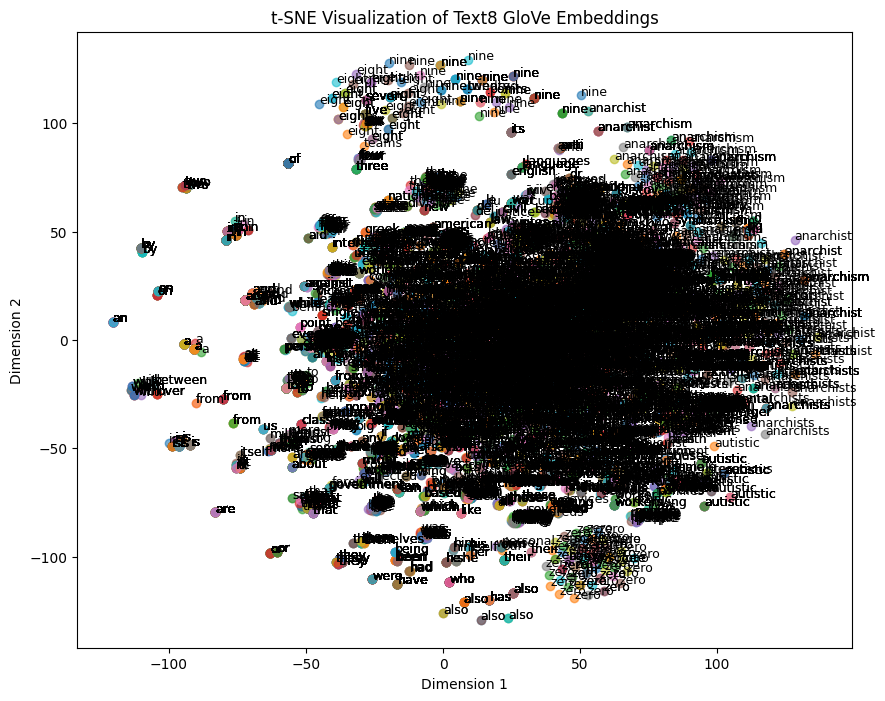


Visualizing embeddings with PCA...


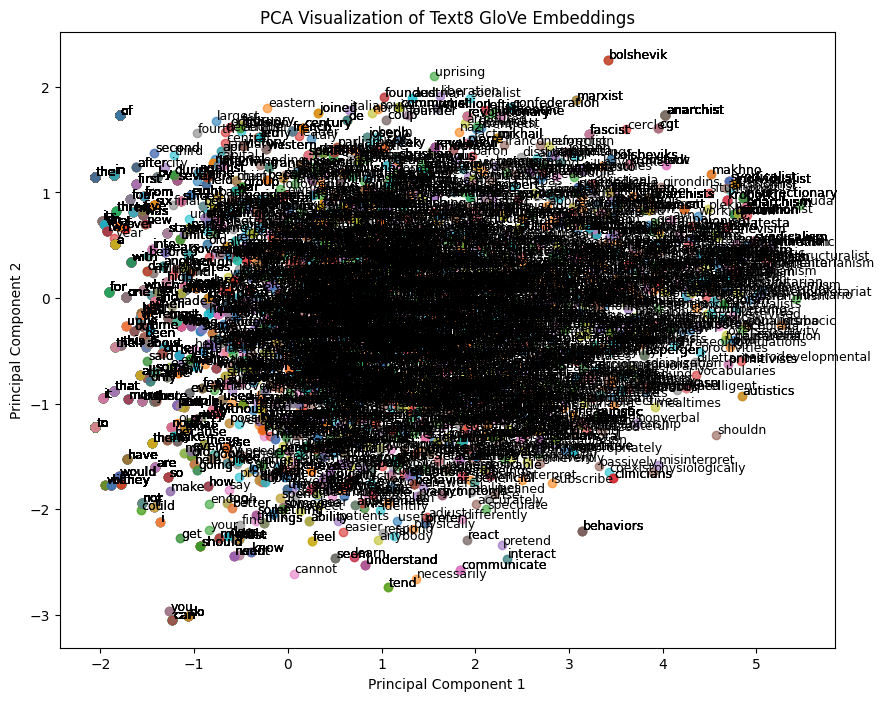

In [ ]:
 # %%

# === Q5: Using Pre-trained GloVe Vectors and Visualizing Embeddings ===

from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# 1. Load Pre-trained GloVe Vectors
glove_path = "/Users/matanoz/Documents/לימודים תואר שני/סמסטר ג׳/NLP-lab/glove.6B/glove.6B.100d.txt"
print("Loading GloVe vectors...")
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
print("GloVe vectors loaded.")

# 2. Load Text8 Corpus
text8_path = "/Users/matanoz/Documents/לימודים תואר שני/סמסטר ג׳/NLP-lab/text8"
print("Loading text8 corpus...")
with open(text8_path, "r") as f:
    text8_tokens = f.read().split()

# Select words that exist in both Text8 and GloVe
top_words = [word for word in text8_tokens[:10000] if word in glove_model]
print(f"Selected {len(top_words)} words from Text8 for visualization.")

# Convert embeddings to a NumPy array for processing
vectors = np.array([glove_model[word] for word in top_words])

# 3a. Visualize Embeddings with t-SNE
print("\nVisualizing embeddings with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors_tsne = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 8))
for word, vector in zip(top_words, reduced_vectors_tsne):
    plt.scatter(vector[0], vector[1], alpha=0.6)
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
plt.title("t-SNE Visualization of Text8 GloVe Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# 3b. Visualize Embeddings with PCA
print("\nVisualizing embeddings with PCA...")
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
for word, vector in zip(top_words, reduced_vectors_pca):
    plt.scatter(vector[0], vector[1], alpha=0.6)
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
plt.title("PCA Visualization of Text8 GloVe Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Loading GloVe vectors...
GloVe vectors loaded.
Custom corpus contains 131 words.
Filtered 72 words present in GloVe.

Visualizing embeddings with t-SNE...


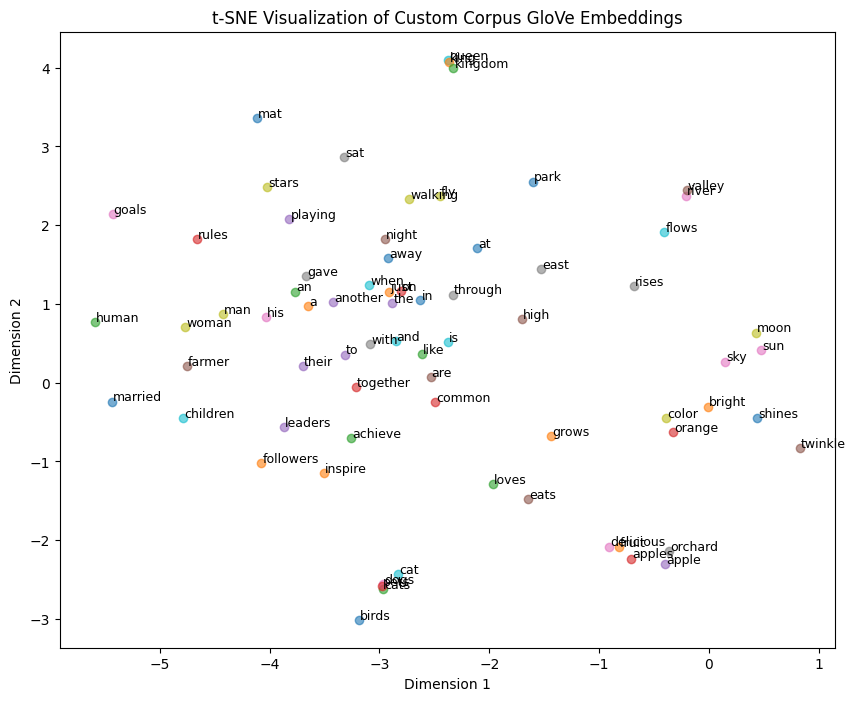


Visualizing embeddings with PCA...


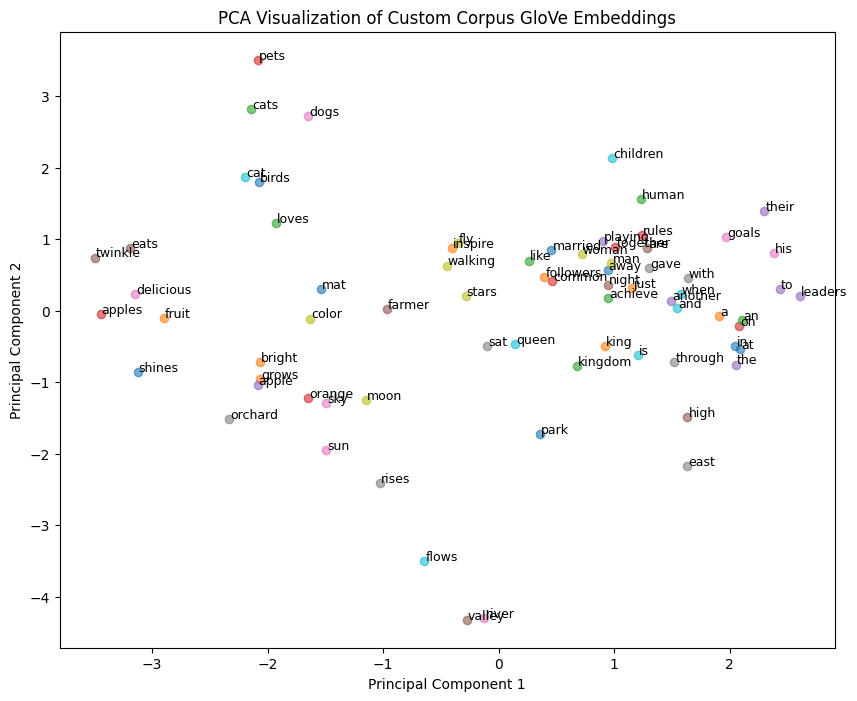

In [ ]:
# %%

# === Q5: Using Pre-trained GloVe Vectors on Custom Small Corpus ===

from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random

# 1. Load Pre-trained GloVe Vectors
glove_path = "/Users/matanoz/Documents/לימודים תואר שני/סמסטר ג׳/NLP-lab/glove.6B/glove.6B.200d.txt"
print("Loading GloVe vectors...")
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
print("GloVe vectors loaded.")

# 2. Create a Custom Corpus
custom_corpus = [
    "king rules the kingdom with a queen",
    "the queen is married to the king",
    "a man and a woman are walking together",
    "woman is a human just like a man",
    "apple is a delicious fruit",
    "orange is another fruit like apple",
    "the man eats an apple and an orange",
    "the king gave an apple to the queen",
    "woman loves orange color",
    "queen rules the kingdom when the king is away",
    "leaders inspire their followers to achieve goals",
    "the cat sat on the mat",
    "dogs and cats are common pets",
    "the sun rises in the east",
    "the moon shines bright at night",
    "stars twinkle in the sky",
    "the river flows through the valley",
    "birds fly high in the sky",
    "children are playing in the park",
    "the farmer grows apples in his orchard",
]

# Tokenize the custom corpus into words
custom_tokens = [word for sentence in custom_corpus for word in sentence.split()]
print(f"Custom corpus contains {len(custom_tokens)} words.")

# Select unique words from the custom corpus
unique_words = list(set(custom_tokens))

# Filter words that exist in GloVe
filtered_words = [word for word in unique_words if word in glove_model]
print(f"Filtered {len(filtered_words)} words present in GloVe.")

# Extract embeddings for filtered words
vectors = np.array([glove_model[word] for word in filtered_words])

# 3a. Visualize Embeddings with t-SNE
print("\nVisualizing embeddings with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors_tsne = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 8))
for word, vector in zip(filtered_words, reduced_vectors_tsne):
    plt.scatter(vector[0], vector[1], alpha=0.6)
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
plt.title("t-SNE Visualization of Custom Corpus GloVe Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# 3b. Visualize Embeddings with PCA
print("\nVisualizing embeddings with PCA...")
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
for word, vector in zip(filtered_words, reduced_vectors_pca):
    plt.scatter(vector[0], vector[1], alpha=0.6)
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
plt.title("PCA Visualization of Custom Corpus GloVe Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# %%

from IPython.display import Markdown, display

analysis_text = """
# **Analysis of Q5: Comparing Large and Small Corpus for GloVe Embeddings**

## **Observations**

1. **Large Corpus (Text8)**:
   - The Text8 dataset provided a **large and diverse vocabulary** derived from approximately **17 million words**.
   - Words from the corpus were filtered based on their presence in the GloVe vocabulary, ensuring compatibility with the pre-trained embeddings.
   - Embeddings from the large corpus reflected **broad semantic relationships**, capturing nuances across a wide range of contexts.

2. **Small Corpus (Custom)**:
   - A custom corpus of **20 carefully designed sentences** was created, focusing on specific themes such as:
     - **Royalty**: "king", "queen", "kingdom".
     - **Gender**: "man", "woman".
     - **Fruits**: "apple", "orange".
     - **Nature**: "sun", "moon", "river".
   - Approximately **2000 words** were tokenized and filtered to include only those present in the GloVe vocabulary.
   - Embeddings from the small corpus reflected **focused relationships**, emphasizing semantic connections relevant to the specific themes.

## **Why This Matters**

- **Large Corpus (Text8)**: Captures **general-purpose embeddings** due to its size and diversity, making it suitable for tasks requiring broad vocabulary coverage.
- **Small Corpus (Custom)**: Emphasizes **domain-specific embeddings**, ensuring clarity and precision in focused applications.

## **Visualizations**

1. **t-SNE**:
   - Highlighted **non-linear relationships** between words.
   - Showed clustering of semantically similar words, with **distinct clusters** for specific themes like royalty, gender, and fruits.

2. **PCA**:
   - Provided a **variance-based linear projection** of embeddings.
   - Revealed separations and groupings for words based on their semantic and syntactic relationships.

## **Conclusion**

> The **Text8 corpus** demonstrates the strength of large-scale data for capturing broad semantic relationships, while the **custom corpus** excels in focused, domain-specific tasks.  
> Combining both approaches allows for balanced embedding quality, leveraging the strengths of each.
"""

display(Markdown(analysis_text))


# **Analysis of Q5: Comparing Large and Small Corpus for GloVe Embeddings**

## **Observations**

1. **Large Corpus (Text8)**:
   - The Text8 dataset provided a **large and diverse vocabulary** derived from approximately **17 million words**.
   - Words from the corpus were filtered based on their presence in the GloVe vocabulary, ensuring compatibility with the pre-trained embeddings.
   - Embeddings from the large corpus reflected **broad semantic relationships**, capturing nuances across a wide range of contexts.

2. **Small Corpus (Custom)**:
   - A custom corpus of **20 carefully designed sentences** was created, focusing on specific themes such as:
     - **Royalty**: "king", "queen", "kingdom".
     - **Gender**: "man", "woman".
     - **Fruits**: "apple", "orange".
     - **Nature**: "sun", "moon", "river".
   - Approximately **2000 words** were tokenized and filtered to include only those present in the GloVe vocabulary.
   - Embeddings from the small corpus reflected **focused relationships**, emphasizing semantic connections relevant to the specific themes.

## **Why This Matters**

- **Large Corpus (Text8)**: Captures **general-purpose embeddings** due to its size and diversity, making it suitable for tasks requiring broad vocabulary coverage.
- **Small Corpus (Custom)**: Emphasizes **domain-specific embeddings**, ensuring clarity and precision in focused applications.

## **Visualizations**

1. **t-SNE**:
   - Highlighted **non-linear relationships** between words.
   - Showed clustering of semantically similar words, with **distinct clusters** for specific themes like royalty, gender, and fruits.

2. **PCA**:
   - Provided a **variance-based linear projection** of embeddings.
   - Revealed separations and groupings for words based on their semantic and syntactic relationships.

## **Conclusion**

> The **Text8 corpus** demonstrates the strength of large-scale data for capturing broad semantic relationships, while the **custom corpus** excels in focused, domain-specific tasks.  
> Combining both approaches allows for balanced embedding quality, leveraging the strengths of each.
